In [1]:
from mlfinlab.data_structures import time_data_structures
# Get processed tick data csv from url
tick_data_url = "https://raw.githubusercontent.com/hudson-and-thames/example-data/main/processed_tick_data.csv"
time_bars = time_data_structures.get_time_bars(
    tick_data_url, resolution="D", verbose=False
)
time_bars  

<frozen mlfinlab.util.fast_ewma>:17: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.


,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
date_time,,,,,,,,,
2023-03-02,13642,804.25,808.0,803.0,807.00,49208,25816,13641,3.963169e+07
2023-03-03,66322,807.00,812.5,806.0,810.75,171378,94591,52680,1.388561e+08


In [2]:
# Let's check the raw tick data to understand the date range
import pandas as pd
raw_data = pd.read_csv(tick_data_url)
print(f"Raw data shape: {raw_data.shape}")
print(f"Date range in raw data:")
print(f"First few rows:")
print(raw_data.head())
print(f"\nLast few rows:")
print(raw_data.tail())

# Check unique dates if date_time column exists
if 'date_time' in raw_data.columns:
    raw_data['date_time'] = pd.to_datetime(raw_data['date_time'])
    print(f"\nDate range: {raw_data['date_time'].min()} to {raw_data['date_time'].max()}")
    print(f"Unique dates: {raw_data['date_time'].dt.date.nunique()}")
    print(f"Date distribution:")
    print(raw_data['date_time'].dt.date.value_counts().sort_index())

Raw data shape: (548575, 3)
Date range in raw data:
First few rows:
                      date   price  volume
0  2023-03-01 17:00:00.083  804.25       8
1  2023-03-01 17:00:00.083  804.25       1
2  2023-03-01 17:00:00.083  804.25       2
3  2023-03-01 17:00:00.083  804.25       1
4  2023-03-01 17:00:00.083  804.25       1

Last few rows:
                           date   price  volume
548570  2023-03-03 14:38:51.647  801.75       1
548571  2023-03-03 14:38:51.647  801.75       7
548572  2023-03-03 14:38:51.647  801.75       1
548573  2023-03-03 14:38:51.647  801.75       2
548574  2023-03-03 14:38:51.647  801.75       1


In [3]:
# Continue analysis with the 'date' column
raw_data['date'] = pd.to_datetime(raw_data['date'])
print(f"\nDate range: {raw_data['date'].min()} to {raw_data['date'].max()}")
print(f"Unique dates: {raw_data['date'].dt.date.nunique()}")
print(f"Date distribution:")
date_counts = raw_data['date'].dt.date.value_counts().sort_index()
print(date_counts)

# Check if there are only 2 trading days in the data
print(f"\nTotal number of unique trading days: {len(date_counts)}")
print(f"This explains why daily bars return only 2 rows - there are only 2 trading days in the dataset!")


Date range: 2023-03-01 17:00:00.083000 to 2023-03-03 14:38:51.647000
Unique dates: 3
Date distribution:
date
2023-03-01     13641
2023-03-02     52680
2023-03-03    482254
Name: count, dtype: int64

Total number of unique trading days: 3
This explains why daily bars return only 2 rows - there are only 2 trading days in the dataset!


In [4]:
# Let's examine March 1st data more closely
march_1_data = raw_data[raw_data['date'].dt.date == pd.to_datetime('2023-03-01').date()]
print(f"March 1st data details:")
print(f"Number of ticks: {len(march_1_data)}")
print(f"Time range on March 1st: {march_1_data['date'].min()} to {march_1_data['date'].max()}")
print(f"First few ticks on March 1st:")
print(march_1_data.head())

# Check if March 1st is during trading hours or after hours
print(f"\nMarch 1st time distribution (hour):")
print(march_1_data['date'].dt.hour.value_counts().sort_index())

# Let's also check what time_data_structures.get_time_bars considers as a valid trading day
print(f"\nLet's try with a different resolution to see more details:")
hourly_bars = time_data_structures.get_time_bars(
    tick_data_url, resolution="H", verbose=False
)
print(f"Hourly bars shape: {hourly_bars.shape}")
print("Hourly bars:")
print(hourly_bars)

March 1st data details:
Number of ticks: 13641
Time range on March 1st: 2023-03-01 17:00:00.083000 to 2023-03-01 23:57:18.393000
First few ticks on March 1st:
                     date   price  volume
0 2023-03-01 17:00:00.083  804.25       8
1 2023-03-01 17:00:00.083  804.25       1
2 2023-03-01 17:00:00.083  804.25       2
3 2023-03-01 17:00:00.083  804.25       1
4 2023-03-01 17:00:00.083  804.25       1

March 1st time distribution (hour):
date
17    4563
18    1083
19    3045
20    1661
21    1356
22    1116
23     817
Name: count, dtype: int64

Let's try with a different resolution to see more details:
Hourly bars shape: (39, 9)
Hourly bars:
                     tick_num    open    high     low   close  volume   
date_time                                                               
2023-03-01 18:00:00      4564  804.25  806.00  803.00  805.75   19792  \
2023-03-01 19:00:00      5647  805.50  805.75  804.00  804.50    3695   
2023-03-01 20:00:00      8692  804.25  807.50  803.7

In [5]:
from mlfinlab.data_structures import standard_data_structures
# Get processed tick data csv from url
tick_data_url = "https://raw.githubusercontent.com/hudson-and-thames/example-data/main/processed_tick_data.csv"
tick_bars = standard_data_structures.get_tick_bars(
    tick_data_url, threshold=5500, batch_size=10000, verbose=False
)
tick_bars  

,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
date_time,,,,,,,,,
2023-03-01 18:53:51.423,5500,804.25,806.00,803.00,804.25,23119,12664,5500,18603064.25
2023-03-01 21:29:57.152,11000,804.25,807.50,803.75,805.50,18940,9118,5500,15265434.25
2023-03-02 01:28:59.673,16500,805.50,808.00,804.25,807.50,15011,8665,5500,12108230.50
2023-03-02 02:22:33.934,22000,807.50,808.50,806.25,808.25,15417,8034,5500,12454098.50
2023-03-02 03:07:48.372,27500,808.25,810.00,807.75,809.50,15328,9110,5500,12399125.00
...,...,...,...,...,...,...,...,...,...
2023-03-03 14:08:32.610,522500,801.00,802.50,800.50,802.25,24579,14868,5500,19699572.25
2023-03-03 14:13:36.066,528000,802.25,802.50,801.25,802.25,23173,11796,5500,18583395.25
2023-03-03 14:18:40.995,533500,802.25,803.00,801.50,801.75,22403,10596,5500,17972674.25


In [6]:
volume_bars = standard_data_structures.get_volume_bars(
    tick_data_url, threshold=28000, batch_size=1000000, verbose=False
)
volume_bars

,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
date_time,,,,,,,,,
2023-03-01 19:32:23.387,7171,804.25,806.00,803.00,806.00,28031,15442,7171,22557998.75
2023-03-02 01:18:21.928,16133,806.00,808.00,804.25,807.50,28003,14566,8962,22582320.50
2023-03-02 02:50:32.992,25976,807.50,810.00,806.25,808.75,28000,15550,9843,22631902.25
2023-03-02 04:57:09.236,35968,808.75,811.25,807.75,810.00,28000,14211,9992,22674594.25
2023-03-02 07:04:32.076,43461,810.00,812.50,809.75,811.50,28013,17300,7493,22720645.25
...,...,...,...,...,...,...,...,...,...
2023-03-03 14:08:14.698,521168,800.50,802.25,800.25,802.00,28000,16708,6296,22429621.00
2023-03-03 14:13:20.950,527711,802.00,802.50,801.25,802.00,28078,14482,6543,22517776.50
2023-03-03 14:20:00.511,534436,802.25,803.00,801.25,801.25,28002,13191,6725,22462073.00


In [7]:
volume_bars_average = standard_data_structures.get_volume_bars(
    tick_data_url, threshold=28000, batch_size=1000000, verbose=False, average=True
)
volume_bars_average

,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value,average_volume
date_time,,,,,,,,,,
2023-03-01 19:32:23.387,7171,804.25,806.00,803.00,806.00,28031,15442,7171,22557998.75,3.908939
2023-03-02 01:18:21.928,16133,806.00,808.00,804.25,807.50,28003,14566,8962,22582320.50,3.124637
2023-03-02 02:50:32.992,25976,807.50,810.00,806.25,808.75,28000,15550,9843,22631902.25,2.844661
2023-03-02 04:57:09.236,35968,808.75,811.25,807.75,810.00,28000,14211,9992,22674594.25,2.802242
2023-03-02 07:04:32.076,43461,810.00,812.50,809.75,811.50,28013,17300,7493,22720645.25,3.738556
...,...,...,...,...,...,...,...,...,...,...
2023-03-03 14:08:14.698,521168,800.50,802.25,800.25,802.00,28000,16708,6296,22429621.00,4.447268
2023-03-03 14:13:20.950,527711,802.00,802.50,801.25,802.00,28078,14482,6543,22517776.50,4.291304
2023-03-03 14:20:00.511,534436,802.25,803.00,801.25,801.25,28002,13191,6725,22462073.00,4.163866


In [8]:
# Dollar Bars
dollar_bars = standard_data_structures.get_dollar_bars(
    tick_data_url, threshold=10000000, batch_size=1000000, verbose=False
)
print("Dollar Bars:")
print(dollar_bars)
print(f"Dollar bars shape: {dollar_bars.shape}")

Dollar Bars:
                         tick_num    open    high     low   close  volume   
date_time                                                                   
2023-03-01 17:21:07.831      2883  804.25  806.00  803.00  804.50   12434  \
2023-03-01 19:10:41.010      6121  804.25  806.00  803.75  805.00   12423   
2023-03-01 20:27:55.076      9590  805.00  807.50  804.75  806.25   12407   
2023-03-02 00:05:02.333     13827  806.25  808.00  804.25  806.75   12407   
2023-03-02 02:02:16.730     18561  806.75  808.50  806.00  807.75   12390   
...                           ...     ...     ...     ...     ...     ...   
2023-03-03 14:20:00.544    534458  802.50  802.50  801.00  801.00   12470   
2023-03-03 14:24:08.654    537230  801.00  802.00  800.50  800.50   12482   
2023-03-03 14:28:32.192    540204  800.50  801.25  800.50  800.50   12587   
2023-03-03 14:32:56.096    543407  800.50  802.25  800.50  801.25   12514   
2023-03-03 14:36:46.895    546425  801.25  802.25  801.00  801.

In [9]:
from mlfinlab.data_structures.imbalance_data_structures import (
     get_ema_dollar_imbalance_bars,
     get_const_dollar_imbalance_bars,
     )
 # Get processed tick data csv from url
# tick_data_url = "https://raw.githubusercontent.com/hudson-and-thames/example-data/main/processed_tick_data.csv"
 # EMA Dollar Imbalance Bars
dollar_imbalance_ema, df_thresholds = get_ema_dollar_imbalance_bars(
    tick_data_url,
    num_prev_bars=3,
    exp_num_ticks_init=10000,
    exp_num_ticks_constraints=[100, 1000],
    expected_imbalance_window=1000,
    batch_size=10000,
    verbose=False,
    analyse_thresholds=True,
)  # Also return thresholds


In [10]:
len(dollar_imbalance_ema)

130

In [11]:
dollar_imbalance_ema.columns

Index(['tick_num', 'open', 'high', 'low', 'close', 'volume', 'cum_buy_volume',
       'cum_ticks', 'cum_dollar_value'],
      dtype='object')

In [12]:
print("Dollar Imbalance Bars:")
print(dollar_imbalance_ema)
print(f"Dollar bars shape: {dollar_imbalance_ema.shape}")

Dollar Imbalance Bars:
                         tick_num    open    high     low   close  volume   
date_time                                                                   
2023-03-02 02:36:59.979     24038  804.25  809.75  803.00  809.75   78606  \
2023-03-02 03:32:33.720     29679  809.75  810.25  807.75  810.25   15317   
2023-03-02 04:49:39.254     35513  810.25  811.25  809.25  809.50   16768   
2023-03-02 05:34:54.146     37332  809.50  811.00  809.25  810.75    5988   
2023-03-02 05:38:25.956     37703  810.75  811.00  810.75  811.00    1263   
...                           ...     ...     ...     ...     ...     ...   
2023-03-03 14:24:00.706    536965  802.50  803.00  800.75  800.75   62552   
2023-03-03 14:25:01.465    538008  800.75  800.75  800.50  800.50    4318   
2023-03-03 14:30:42.203    541716  800.50  802.00  800.50  802.00   16064   
2023-03-03 14:35:09.469    544979  802.00  802.25  801.00  802.25   13002   
2023-03-03 14:38:08.007    547649  802.25  802.25  80

In [13]:
# Const Dollar Imbalance Bars
dollar_imbalance_const = get_const_dollar_imbalance_bars(
    tick_data_url,
    exp_num_ticks_init=10000,
    expected_imbalance_window=1000,
    batch_size=10000,
    verbose=False,
)


In [14]:
len(dollar_imbalance_const)

3

In [15]:
dollar_imbalance_const.columns  


Index(['tick_num', 'open', 'high', 'low', 'close', 'volume', 'cum_buy_volume',
       'cum_ticks', 'cum_dollar_value'],
      dtype='object')

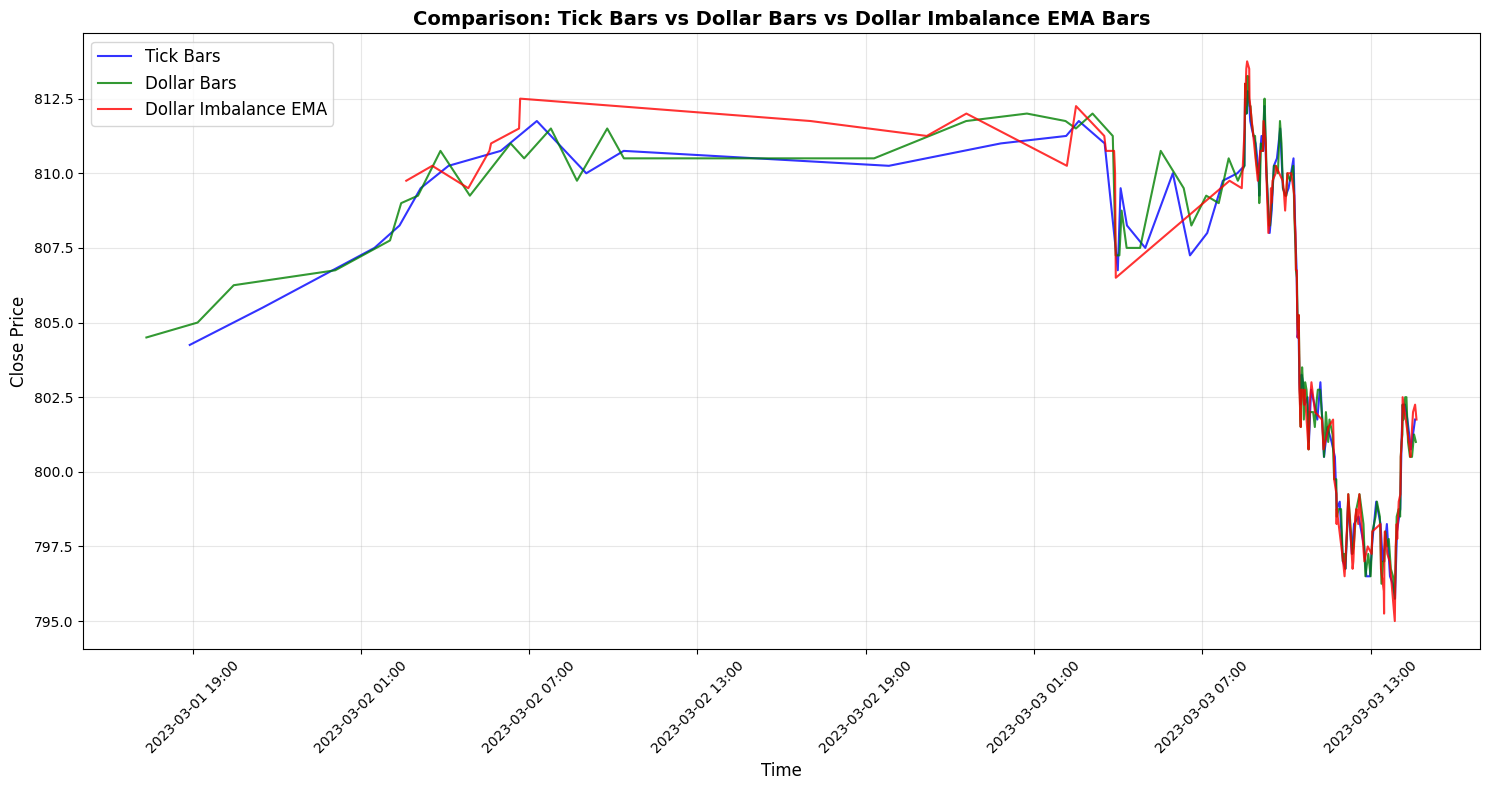

=== DETAILED COMPARISON STATISTICS ===
Tick Bars:
  - Number of bars: 99
  - Time range: 2023-03-01 18:53:51.423000 to 2023-03-03 14:34:59.977000
  - Price range: $795.75 - $812.75
  - Average close price: $805.35
  - Price volatility (std): $5.41

Dollar Bars:
  - Number of bars: 164
  - Time range: 2023-03-01 17:21:07.831000 to 2023-03-03 14:36:46.895000
  - Price range: $795.75 - $813.25
  - Average close price: $805.26
  - Price volatility (std): $5.46

Dollar Imbalance EMA Bars:
  - Number of bars: 130
  - Time range: 2023-03-02 02:36:59.979000 to 2023-03-03 14:38:08.007000
  - Price range: $795.00 - $813.75
  - Average close price: $804.55
  - Price volatility (std): $5.62

=== SAMPLING FREQUENCY COMPARISON ===
Tick Bars: 1 bar per 5500 ticks
Dollar Bars: 1 bar per $10000000 traded
Dollar Imbalance EMA: Adaptive based on order flow imbalance


In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Create a single plot comparing all three bar types
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# Plot all three bar types on the same axes
ax.plot(tick_bars.index, tick_bars['close'], 'b-', linewidth=1.5, label='Tick Bars', alpha=0.8)
ax.plot(dollar_bars.index, dollar_bars['close'], 'g-', linewidth=1.5, label='Dollar Bars', alpha=0.8)
ax.plot(dollar_imbalance_ema.index, dollar_imbalance_ema['close'], 'r-', linewidth=1.5, label='Dollar Imbalance EMA', alpha=0.8)

# Customize the plot
ax.set_title('Comparison: Tick Bars vs Dollar Bars vs Dollar Imbalance EMA Bars', fontsize=14, fontweight='bold')
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Close Price', fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=12)

# Format x-axis for better readability
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Print detailed comparison statistics
print("=== DETAILED COMPARISON STATISTICS ===")
print(f"Tick Bars:")
print(f"  - Number of bars: {len(tick_bars)}")
print(f"  - Time range: {tick_bars.index.min()} to {tick_bars.index.max()}")
print(f"  - Price range: ${tick_bars['close'].min():.2f} - ${tick_bars['close'].max():.2f}")
print(f"  - Average close price: ${tick_bars['close'].mean():.2f}")
print(f"  - Price volatility (std): ${tick_bars['close'].std():.2f}")

print(f"\nDollar Bars:")
print(f"  - Number of bars: {len(dollar_bars)}")
print(f"  - Time range: {dollar_bars.index.min()} to {dollar_bars.index.max()}")
print(f"  - Price range: ${dollar_bars['close'].min():.2f} - ${dollar_bars['close'].max():.2f}")
print(f"  - Average close price: ${dollar_bars['close'].mean():.2f}")
print(f"  - Price volatility (std): ${dollar_bars['close'].std():.2f}")

print(f"\nDollar Imbalance EMA Bars:")
print(f"  - Number of bars: {len(dollar_imbalance_ema)}")
print(f"  - Time range: {dollar_imbalance_ema.index.min()} to {dollar_imbalance_ema.index.max()}")
print(f"  - Price range: ${dollar_imbalance_ema['close'].min():.2f} - ${dollar_imbalance_ema['close'].max():.2f}")
print(f"  - Average close price: ${dollar_imbalance_ema['close'].mean():.2f}")
print(f"  - Price volatility (std): ${dollar_imbalance_ema['close'].std():.2f}")

# Show the sampling frequency comparison
print(f"\n=== SAMPLING FREQUENCY COMPARISON ===")
print(f"Tick Bars: 1 bar per {5500} ticks")
print(f"Dollar Bars: 1 bar per ${10000000} traded")
print(f"Dollar Imbalance EMA: Adaptive based on order flow imbalance")

=== SERIAL CORRELATION ANALYSIS ===

DOLLAR BARS - Serial Correlation:
  Lag 1: -0.0625 (p-value: 0.4294) 
  Lag 2: -0.0377 (p-value: 0.6347) 
  Lag 3: -0.0652 (p-value: 0.4128) 
  Lag 4: 0.0916 (p-value: 0.2511) 
  Lag 5: 0.0579 (p-value: 0.4696) 
  Lag 6: -0.1204 (p-value: 0.1330) 
  Lag 7: 0.0137 (p-value: 0.8650) 
  Lag 8: 0.0821 (p-value: 0.3096) 
  Lag 9: 0.0279 (p-value: 0.7316) 
  Lag 10: -0.0203 (p-value: 0.8037) 

DOLLAR IMBALANCE EMA BARS - Serial Correlation:
  Lag 1: -0.0771 (p-value: 0.3870) 
  Lag 2: -0.0365 (p-value: 0.6837) 
  Lag 3: -0.1014 (p-value: 0.2583) 
  Lag 4: -0.1379 (p-value: 0.1251) 
  Lag 5: 0.2183 (p-value: 0.0149) *
  Lag 6: 0.0585 (p-value: 0.5204) 
  Lag 7: 0.0548 (p-value: 0.5491) 
  Lag 8: -0.0465 (p-value: 0.6125) 
  Lag 9: -0.1644 (p-value: 0.0727) 
  Lag 10: -0.0418 (p-value: 0.6516) 


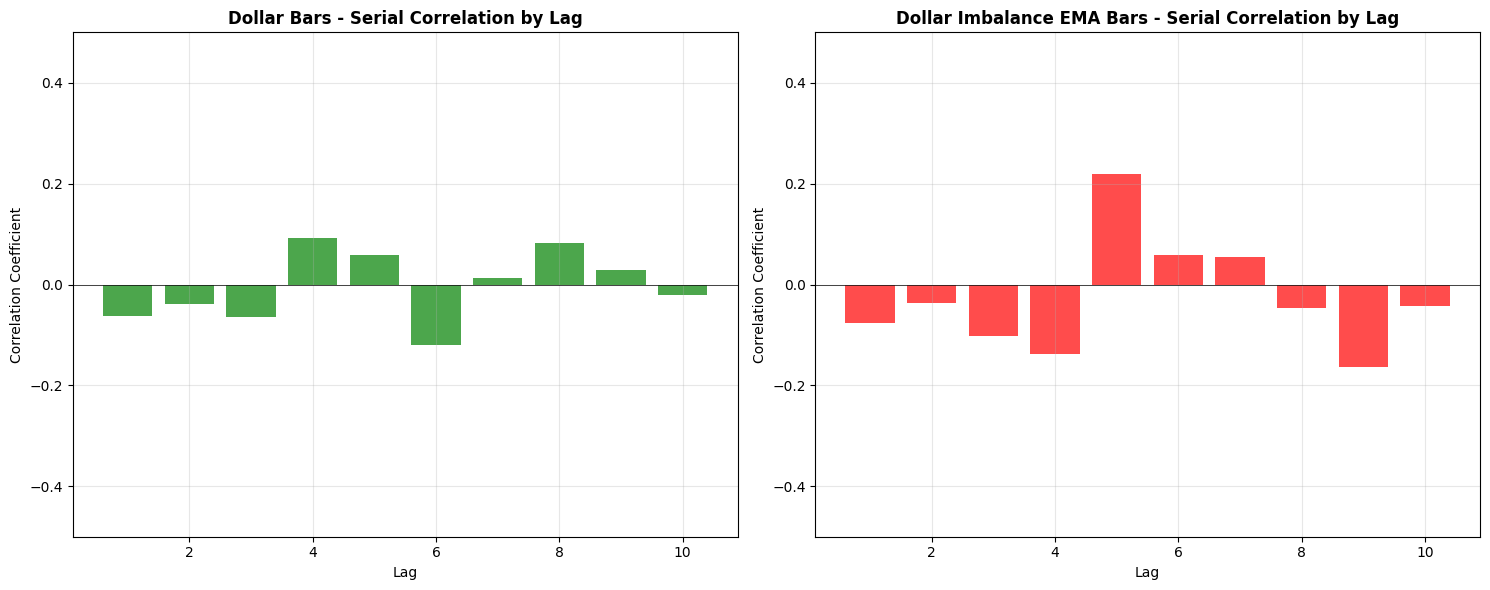


=== SUMMARY STATISTICS ===
Dollar Bars Returns:
  - Mean: -0.000026
  - Std: 0.001231
  - Skewness: -0.1557
  - Kurtosis: 1.0156
  - Number of observations: 163

Dollar Imbalance EMA Returns:
  - Mean: -0.000076
  - Std: 0.001248
  - Skewness: 0.0742
  - Kurtosis: 0.6968
  - Number of observations: 129

=== LJUNG-BOX TEST FOR SERIAL CORRELATION ===

Dollar Bars - Ljung-Box Test:
  Lags with significant serial correlation (p < 0.05):
    No significant serial correlation detected

Dollar Imbalance EMA - Ljung-Box Test:
  Lags with significant serial correlation (p < 0.05):
    No significant serial correlation detected

*** = p < 0.001, ** = p < 0.01, * = p < 0.05


In [17]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Calculate returns for both bar types
dollar_bars_returns = dollar_bars['close'].pct_change().dropna()
dollar_imbalance_ema_returns = dollar_imbalance_ema['close'].pct_change().dropna()

# Function to calculate serial correlation at different lags
def calculate_serial_correlation(returns, max_lags=10):
    """Calculate serial correlation (autocorrelation) for different lags"""
    correlations = {}
    p_values = {}
    
    for lag in range(1, max_lags + 1):
        # Calculate correlation between returns and lagged returns
        corr, p_value = stats.pearsonr(returns[lag:], returns[:-lag])
        correlations[lag] = corr
        p_values[lag] = p_value
    
    return correlations, p_values

# Calculate serial correlations
print("=== SERIAL CORRELATION ANALYSIS ===")

# Dollar Bars
dollar_bars_corr, dollar_bars_pval = calculate_serial_correlation(dollar_bars_returns, max_lags=10)
print("\nDOLLAR BARS - Serial Correlation:")
for lag in range(1, 11):
    significance = "***" if dollar_bars_pval[lag] < 0.001 else "**" if dollar_bars_pval[lag] < 0.01 else "*" if dollar_bars_pval[lag] < 0.05 else ""
    print(f"  Lag {lag}: {dollar_bars_corr[lag]:.4f} (p-value: {dollar_bars_pval[lag]:.4f}) {significance}")

# Dollar Imbalance EMA Bars
dollar_imbalance_corr, dollar_imbalance_pval = calculate_serial_correlation(dollar_imbalance_ema_returns, max_lags=10)
print("\nDOLLAR IMBALANCE EMA BARS - Serial Correlation:")
for lag in range(1, 11):
    significance = "***" if dollar_imbalance_pval[lag] < 0.001 else "**" if dollar_imbalance_pval[lag] < 0.01 else "*" if dollar_imbalance_pval[lag] < 0.05 else ""
    print(f"  Lag {lag}: {dollar_imbalance_corr[lag]:.4f} (p-value: {dollar_imbalance_pval[lag]:.4f}) {significance}")

# Plot comparison of serial correlations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot Dollar Bars serial correlation
lags = list(range(1, 11))
dollar_bars_corr_values = [dollar_bars_corr[lag] for lag in lags]
ax1.bar(lags, dollar_bars_corr_values, alpha=0.7, color='green')
ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax1.set_title('Dollar Bars - Serial Correlation by Lag', fontweight='bold')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Correlation Coefficient')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-0.5, 0.5)

# Plot Dollar Imbalance EMA serial correlation
dollar_imbalance_corr_values = [dollar_imbalance_corr[lag] for lag in lags]
ax2.bar(lags, dollar_imbalance_corr_values, alpha=0.7, color='red')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.set_title('Dollar Imbalance EMA Bars - Serial Correlation by Lag', fontweight='bold')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Correlation Coefficient')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(-0.5, 0.5)

plt.tight_layout()
plt.show()

# Summary statistics
print("\n=== SUMMARY STATISTICS ===")
print(f"Dollar Bars Returns:")
print(f"  - Mean: {dollar_bars_returns.mean():.6f}")
print(f"  - Std: {dollar_bars_returns.std():.6f}")
print(f"  - Skewness: {dollar_bars_returns.skew():.4f}")
print(f"  - Kurtosis: {dollar_bars_returns.kurtosis():.4f}")
print(f"  - Number of observations: {len(dollar_bars_returns)}")

print(f"\nDollar Imbalance EMA Returns:")
print(f"  - Mean: {dollar_imbalance_ema_returns.mean():.6f}")
print(f"  - Std: {dollar_imbalance_ema_returns.std():.6f}")
print(f"  - Skewness: {dollar_imbalance_ema_returns.skew():.4f}")
print(f"  - Kurtosis: {dollar_imbalance_ema_returns.kurtosis():.4f}")
print(f"  - Number of observations: {len(dollar_imbalance_ema_returns)}")

# Ljung-Box test for serial correlation (more formal test)

try:
    # Test for serial correlation using Ljung-Box test
    from statsmodels.stats.diagnostic import acorr_ljungbox
    
    print(f"\n=== LJUNG-BOX TEST FOR SERIAL CORRELATION ===")
    
    # Dollar Bars
    lb_dollar = acorr_ljungbox(dollar_bars_returns, lags=10, return_df=True)
    print(f"\nDollar Bars - Ljung-Box Test:")
    print(f"  Lags with significant serial correlation (p < 0.05):")
    significant_lags_dollar = lb_dollar[lb_dollar['lb_pvalue'] < 0.05]
    if len(significant_lags_dollar) > 0:
        for lag in significant_lags_dollar.index:
            print(f"    Lag {lag}: LB-stat = {lb_dollar.loc[lag, 'lb_stat']:.4f}, p-value = {lb_dollar.loc[lag, 'lb_pvalue']:.4f}")
    else:
        print("    No significant serial correlation detected")
    
    # Dollar Imbalance EMA
    lb_imbalance = acorr_ljungbox(dollar_imbalance_ema_returns, lags=10, return_df=True)
    print(f"\nDollar Imbalance EMA - Ljung-Box Test:")
    print(f"  Lags with significant serial correlation (p < 0.05):")
    significant_lags_imbalance = lb_imbalance[lb_imbalance['lb_pvalue'] < 0.05]
    if len(significant_lags_imbalance) > 0:
        for lag in significant_lags_imbalance.index:
            print(f"    Lag {lag}: LB-stat = {lb_imbalance.loc[lag, 'lb_stat']:.4f}, p-value = {lb_imbalance.loc[lag, 'lb_pvalue']:.4f}")
    else:
        print("    No significant serial correlation detected")
        
except ImportError:
    print("\nNote: Install statsmodels for Ljung-Box test: pip install statsmodels")

print(f"\n*** = p < 0.001, ** = p < 0.01, * = p < 0.05")

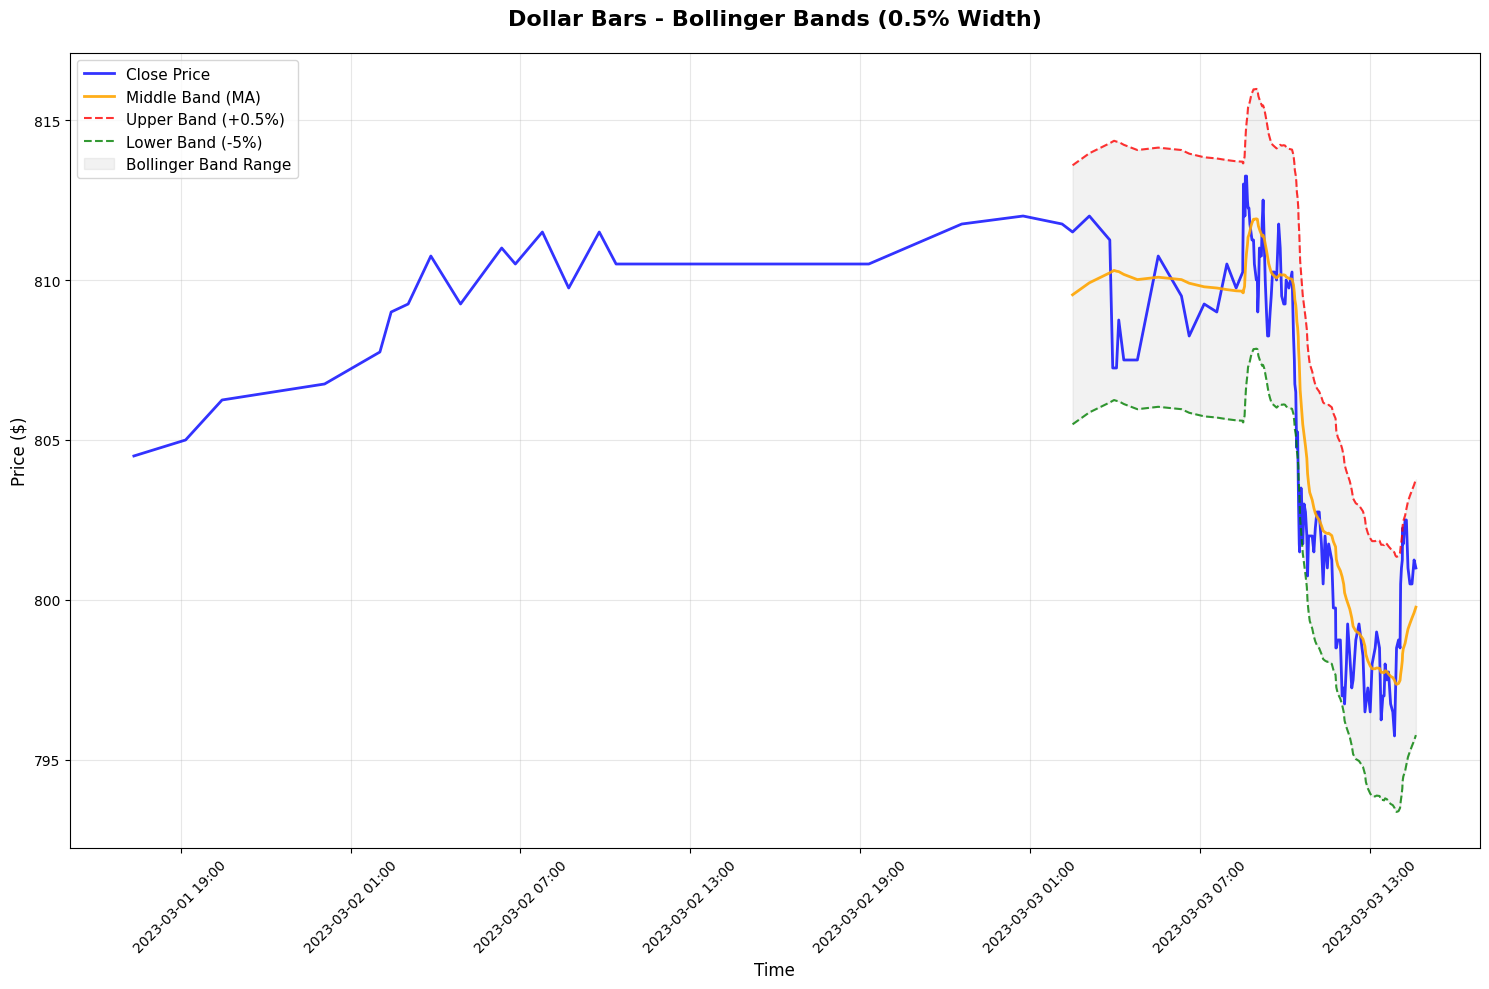

=== BOLLINGER BANDS STATISTICS ===
Total observations: 145
Price range: $795.75 - $813.25

Band Statistics (last 10 observations):
  2023-03-03 14:07:59: Price=$801.25, Lower=$794.11, Upper=$802.09
  2023-03-03 14:08:33: Price=$802.25, Lower=$794.32, Upper=$802.30
  2023-03-03 14:10:04: Price=$801.75, Lower=$794.48, Upper=$802.47
  2023-03-03 14:13:58: Price=$802.50, Lower=$794.66, Upper=$802.64
  2023-03-03 14:16:36: Price=$802.50, Lower=$794.86, Upper=$802.84
  2023-03-03 14:20:00: Price=$801.00, Lower=$795.09, Upper=$803.08
  2023-03-03 14:24:08: Price=$800.50, Lower=$795.27, Upper=$803.26
  2023-03-03 14:28:32: Price=$800.50, Lower=$795.44, Upper=$803.43
  2023-03-03 14:32:56: Price=$801.25, Lower=$795.60, Upper=$803.60
  2023-03-03 14:36:46: Price=$801.00, Lower=$795.78, Upper=$803.77

=== BAND BREACH ANALYSIS ===
Upper band breaches: 0 (0.0%)
Lower band breaches: 4 (2.8%)
Total breaches: 4 (2.8%)

=== CURRENT POSITION ===
Current price: $801.00
Upper band: $803.77
Middle band: $7

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def calculate_bollinger_bands(prices, window=20, width_pct=0.005):
    """
    Calculate Bollinger Bands
    
    Parameters:
    prices: pandas Series of prices
    window: rolling window for moving average (default 20)
    width_pct: width as percentage (0.005 = 5%)
    
    Returns:
    DataFrame with middle_band, upper_band, lower_band
    """
    # Calculate moving average (middle band)
    middle_band = prices.rolling(window=window).mean()
    
    # Calculate standard deviation
    rolling_std = prices.rolling(window=window).std()
    
    # Calculate bands using percentage width
    # For 5% width, we use width_pct to determine the band distance
    upper_band = middle_band * (1 + width_pct)
    lower_band = middle_band * (1 - width_pct)
    
    return pd.DataFrame({
        'middle_band': middle_band,
        'upper_band': upper_band,
        'lower_band': lower_band,
        'price': prices
    })

# Calculate Bollinger Bands for dollar_bars
bb_data = calculate_bollinger_bands(dollar_bars['close'], window=20, width_pct=0.005)

# Create the chart
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the price and Bollinger Bands
ax.plot(dollar_bars.index, bb_data['price'], 'b-', linewidth=2, label='Close Price', alpha=0.8)
ax.plot(dollar_bars.index, bb_data['middle_band'], 'orange', linewidth=2, label='Middle Band (MA)', alpha=0.9)
ax.plot(dollar_bars.index, bb_data['upper_band'], 'r--', linewidth=1.5, label='Upper Band (+0.5%)', alpha=0.8)
ax.plot(dollar_bars.index, bb_data['lower_band'], 'g--', linewidth=1.5, label='Lower Band (-5%)', alpha=0.8)

# Fill the area between bands
ax.fill_between(dollar_bars.index, bb_data['upper_band'], bb_data['lower_band'], 
                alpha=0.1, color='gray', label='Bollinger Band Range')

# Customize the plot
ax.set_title('Dollar Bars - Bollinger Bands (0.5% Width)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Price ($)', fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11, loc='upper left')

# Format x-axis for better readability
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Print statistics
print("=== BOLLINGER BANDS STATISTICS ===")
print(f"Total observations: {len(bb_data.dropna())}")
print(f"Price range: ${bb_data['price'].min():.2f} - ${bb_data['price'].max():.2f}")
print(f"\nBand Statistics (last 10 observations):")
recent_data = bb_data.tail(10).dropna()
for i, (idx, row) in enumerate(recent_data.iterrows()):
    print(f"  {idx.strftime('%Y-%m-%d %H:%M:%S')}: "
          f"Price=${row['price']:.2f}, "
          f"Lower=${row['lower_band']:.2f}, "
          f"Upper=${row['upper_band']:.2f}")

# Calculate band touches/breaches
upper_breaches = (bb_data['price'] > bb_data['upper_band']).sum()
lower_breaches = (bb_data['price'] < bb_data['lower_band']).sum()
total_valid_points = len(bb_data.dropna())

print(f"\n=== BAND BREACH ANALYSIS ===")
print(f"Upper band breaches: {upper_breaches} ({upper_breaches/total_valid_points*100:.1f}%)")
print(f"Lower band breaches: {lower_breaches} ({lower_breaches/total_valid_points*100:.1f}%)")
print(f"Total breaches: {upper_breaches + lower_breaches} ({(upper_breaches + lower_breaches)/total_valid_points*100:.1f}%)")

# Show current position relative to bands
last_price = bb_data['price'].iloc[-1]
last_upper = bb_data['upper_band'].iloc[-1]
last_lower = bb_data['lower_band'].iloc[-1]
last_middle = bb_data['middle_band'].iloc[-1]

print(f"\n=== CURRENT POSITION ===")
print(f"Current price: ${last_price:.2f}")
print(f"Upper band: ${last_upper:.2f}")
print(f"Middle band: ${last_middle:.2f}")
print(f"Lower band: ${last_lower:.2f}")

if last_price > last_upper:
    print("Position: ABOVE upper band (potentially overbought)")
elif last_price < last_lower:
    print("Position: BELOW lower band (potentially oversold)")
else:
    band_position = (last_price - last_lower) / (last_upper - last_lower) * 100
    print(f"Position: {band_position:.1f}% within bands")

In [25]:
def getTEvents(gRaw, h):
    tEvents, sPos, sNeg = [], 0 ,0
    diff = gRaw.diff()
    for i in diff.index[1:]:
        sPos = max(0, sPos + diff.loc[i])
        sNeg = min(0, sNeg + diff.loc[i])
        if sPos > h:
            sPos = 0
            tEvents.append(i)
        elif sNeg < -h:
            sNeg = 0
            tEvents.append(i)

    return pd.DatetimeIndex(tEvents)

=== MLFinLab CUSUM FILTER ANALYSIS ===
Threshold (h): 0.005
Total T-Events detected: 9
Original dollar bars: 164
Sampling ratio: 5.5%

First 10 T-Events:
  1: 2023-03-02 02:26:08 - Price: $809.00
  2: 2023-03-03 03:54:36 - Price: $807.25
  3: 2023-03-03 08:31:07 - Price: $812.00
  4: 2023-03-03 09:01:47 - Price: $809.00
  5: 2023-03-03 09:22:34 - Price: $808.25
  6: 2023-03-03 10:19:19 - Price: $807.50
  7: 2023-03-03 10:28:10 - Price: $803.00
  8: 2023-03-03 11:47:12 - Price: $798.50
  9: 2023-03-03 14:04:26 - Price: $800.50

=== COMPARISON ===
MLFinLab CUSUM events: 9
Custom getTEvents: 142
Events match: False


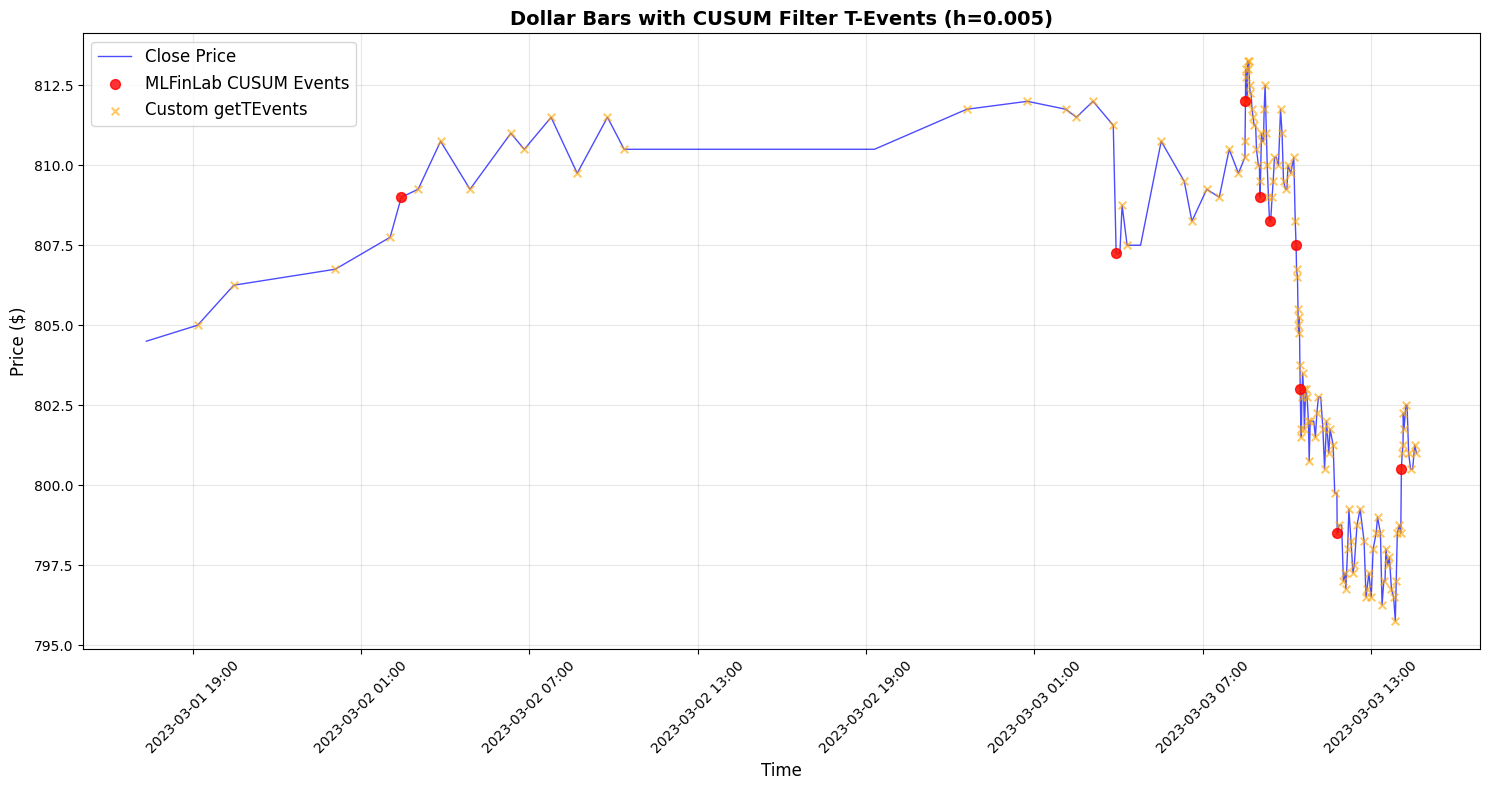

In [27]:
from mlfinlab.filters.filters import cusum_filter

# Use MLFinLab's CUSUM filter
h_threshold = 0.005  # Your desired threshold
gRaw = dollar_bars['close']

# Get T-Events using MLFinLab's CUSUM filter
t_events_mlfinlab = cusum_filter(gRaw, threshold=h_threshold)

print(f"=== MLFinLab CUSUM FILTER ANALYSIS ===")
print(f"Threshold (h): {h_threshold}")
print(f"Total T-Events detected: {len(t_events_mlfinlab)}")
print(f"Original dollar bars: {len(dollar_bars)}")
print(f"Sampling ratio: {len(t_events_mlfinlab)/len(dollar_bars)*100:.1f}%")

print(f"\nFirst 10 T-Events:")
for i, event_time in enumerate(t_events_mlfinlab[:10]):
    price = dollar_bars.loc[event_time, 'close']
    print(f"  {i+1}: {event_time.strftime('%Y-%m-%d %H:%M:%S')} - Price: ${price:.2f}")

# Compare with your custom function
t_events_custom = getTEvents(gRaw, h_threshold)
print(f"\n=== COMPARISON ===")
print(f"MLFinLab CUSUM events: {len(t_events_mlfinlab)}")
print(f"Custom getTEvents: {len(t_events_custom)}")
print(f"Events match: {t_events_mlfinlab.equals(t_events_custom)}")

# Visualize both
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# Plot the close prices
ax.plot(dollar_bars.index, dollar_bars['close'], 'b-', linewidth=1, label='Close Price', alpha=0.7)

# Mark MLFinLab T-Events
t_event_prices_ml = [dollar_bars.loc[t, 'close'] for t in t_events_mlfinlab]
ax.scatter(t_events_mlfinlab, t_event_prices_ml, color='red', s=50, alpha=0.8, 
           label='MLFinLab CUSUM Events', zorder=5)

# Mark custom T-Events (if different)
if not t_events_mlfinlab.equals(t_events_custom):
    t_event_prices_custom = [dollar_bars.loc[t, 'close'] for t in t_events_custom]
    ax.scatter(t_events_custom, t_event_prices_custom, color='orange', s=30, alpha=0.6, 
               label='Custom getTEvents', zorder=4, marker='x')

# Customize the plot
ax.set_title(f'Dollar Bars with CUSUM Filter T-Events (h={h_threshold})', fontsize=14, fontweight='bold')
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Price ($)', fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=12)

# Format x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

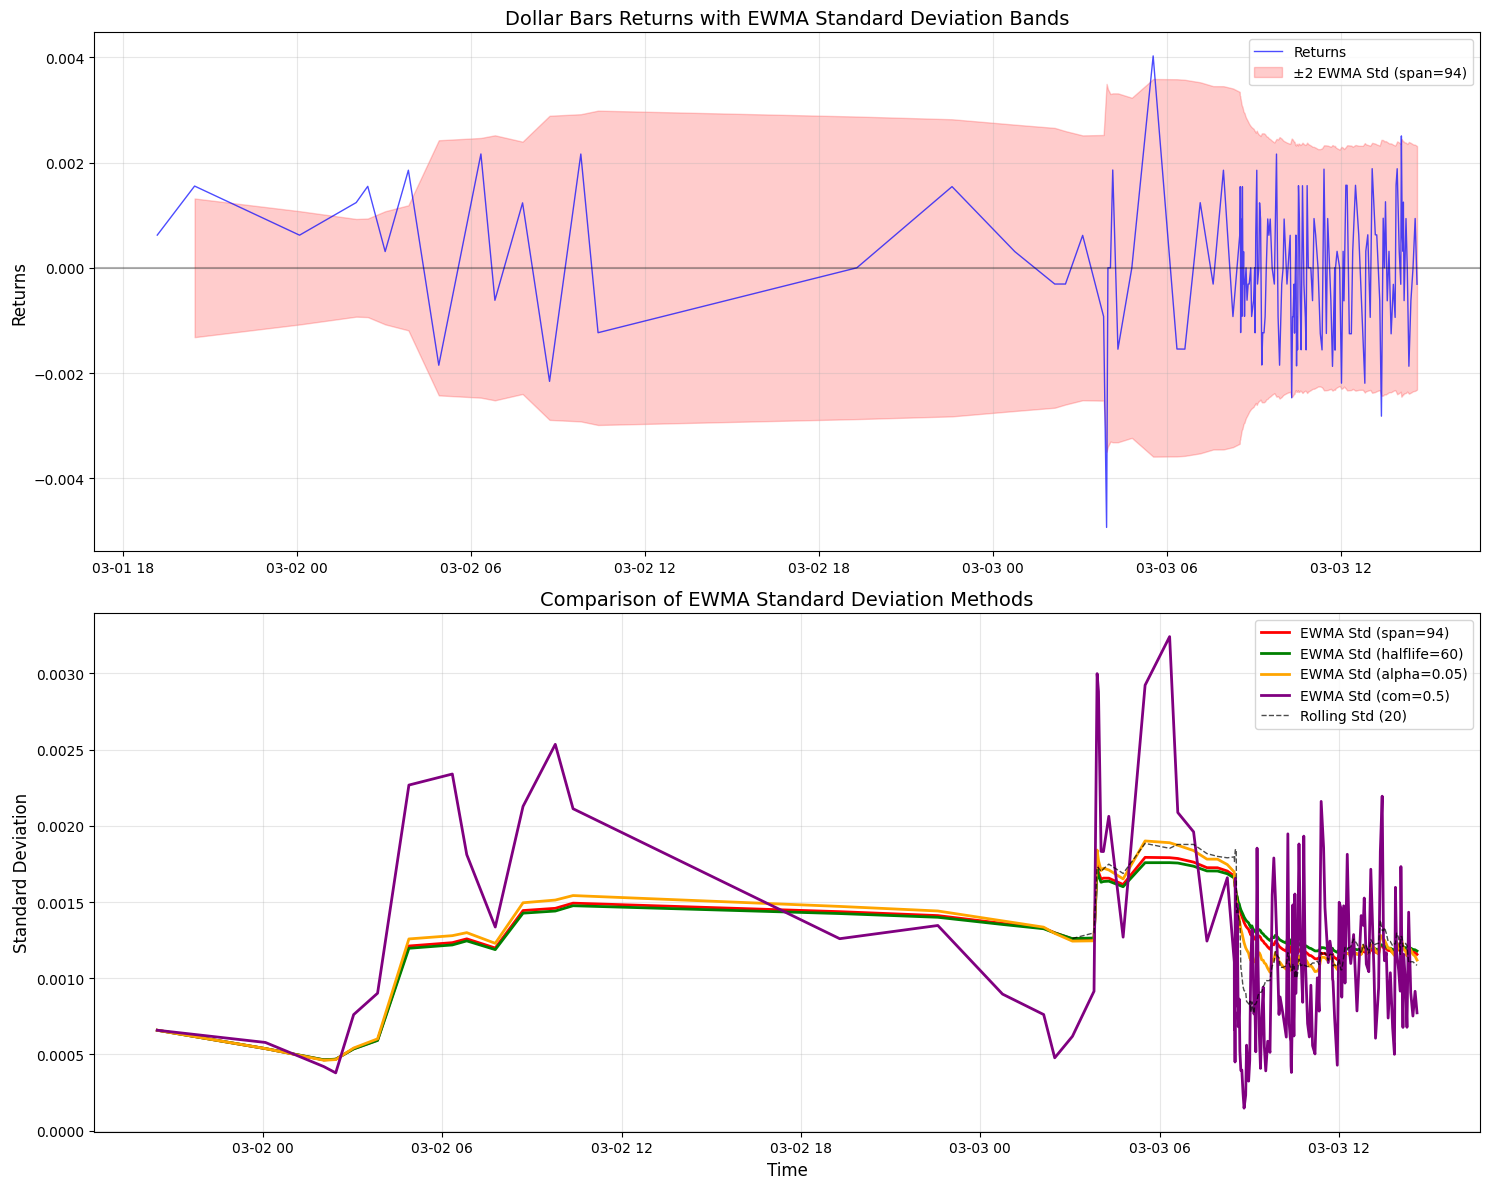

=== EWMA STANDARD DEVIATION ANALYSIS ===
Returns statistics:
  Mean: -0.000026
  Std: 0.001231
  Number of observations: 163

EWMA Standard Deviation (last 10 observations):
Span method (span=94):
  2023-03-03 14:07:59: 0.001202
  2023-03-03 14:08:33: 0.001203
  2023-03-03 14:10:04: 0.001193
  2023-03-03 14:13:58: 0.001188
  2023-03-03 14:16:36: 0.001175
  2023-03-03 14:20:00: 0.001195
  2023-03-03 14:24:08: 0.001186
  2023-03-03 14:28:32: 0.001173
  2023-03-03 14:32:56: 0.001168
  2023-03-03 14:36:46: 0.001156

Current EWMA Standard Deviations:
  Span method: 0.001156
  Halflife method: 0.001179
  Alpha method: 0.001119
  COM method: 0.000773
  Rolling std (20): 0.001084

Volatility-Adjusted Returns Statistics:
  Mean: 0.018445
  Std: 1.031271


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate returns for dollar bars
dollar_bars_returns = dollar_bars['close'].pct_change().dropna()

# Calculate EWMA standard deviation
# You can use different methods:

# Method 1: Using pandas ewm with span (common choice is span=94 for daily data)
span = 94  # Adjust based on your data frequency
ewma_std_span = dollar_bars_returns.ewm(span=span).std()

# Method 2: Using pandas ewm with halflife (decay parameter)
halflife = 60  # Number of periods for half-life decay
ewma_std_halflife = dollar_bars_returns.ewm(halflife=halflife).std()

# Method 3: Using alpha parameter directly
alpha = 0.05  # Smoothing parameter (0 < alpha <= 1)
ewma_std_alpha = dollar_bars_returns.ewm(alpha=alpha).std()

# Method 4: Using com (center of mass)
com = 0.5  # Center of mass
ewma_std_com = dollar_bars_returns.ewm(com=com).std()

# Plot comparison
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Plot 1: Returns with EWMA std bands
axes[0].plot(dollar_bars_returns.index, dollar_bars_returns, 'b-', alpha=0.7, linewidth=1, label='Returns')
axes[0].fill_between(dollar_bars_returns.index, 
                     2*ewma_std_span, -2*ewma_std_span, 
                     alpha=0.2, color='red', label='±2 EWMA Std (span=94)')
axes[0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[0].set_title('Dollar Bars Returns with EWMA Standard Deviation Bands', fontsize=14)
axes[0].set_ylabel('Returns', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Different EWMA std calculations
axes[1].plot(ewma_std_span.index, ewma_std_span, 'r-', label=f'EWMA Std (span={span})', linewidth=2)
axes[1].plot(ewma_std_halflife.index, ewma_std_halflife, 'g-', label=f'EWMA Std (halflife={halflife})', linewidth=2)
axes[1].plot(ewma_std_alpha.index, ewma_std_alpha, 'orange', label=f'EWMA Std (alpha={alpha})', linewidth=2)
axes[1].plot(ewma_std_com.index, ewma_std_com, 'purple', label=f'EWMA Std (com={com})', linewidth=2)

# Add rolling standard deviation for comparison
rolling_window = 20
rolling_std = dollar_bars_returns.rolling(window=rolling_window).std()
axes[1].plot(rolling_std.index, rolling_std, 'k--', alpha=0.7, label=f'Rolling Std ({rolling_window})', linewidth=1)

axes[1].set_title('Comparison of EWMA Standard Deviation Methods', fontsize=14)
axes[1].set_xlabel('Time', fontsize=12)
axes[1].set_ylabel('Standard Deviation', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("=== EWMA STANDARD DEVIATION ANALYSIS ===")
print(f"Returns statistics:")
print(f"  Mean: {dollar_bars_returns.mean():.6f}")
print(f"  Std: {dollar_bars_returns.std():.6f}")
print(f"  Number of observations: {len(dollar_bars_returns)}")

print(f"\nEWMA Standard Deviation (last 10 observations):")
print(f"Span method (span={span}):")
for i, (idx, val) in enumerate(ewma_std_span.tail(10).items()):
    print(f"  {idx.strftime('%Y-%m-%d %H:%M:%S')}: {val:.6f}")

print(f"\nCurrent EWMA Standard Deviations:")
print(f"  Span method: {ewma_std_span.iloc[-1]:.6f}")
print(f"  Halflife method: {ewma_std_halflife.iloc[-1]:.6f}")
print(f"  Alpha method: {ewma_std_alpha.iloc[-1]:.6f}")
print(f"  COM method: {ewma_std_com.iloc[-1]:.6f}")
print(f"  Rolling std ({rolling_window}): {rolling_std.iloc[-1]:.6f}")

# Calculate volatility-adjusted returns (standardized)
volatility_adjusted_returns = dollar_bars_returns / ewma_std_span
print(f"\nVolatility-Adjusted Returns Statistics:")
print(f"  Mean: {volatility_adjusted_returns.mean():.6f}")
print(f"  Std: {volatility_adjusted_returns.std():.6f}")

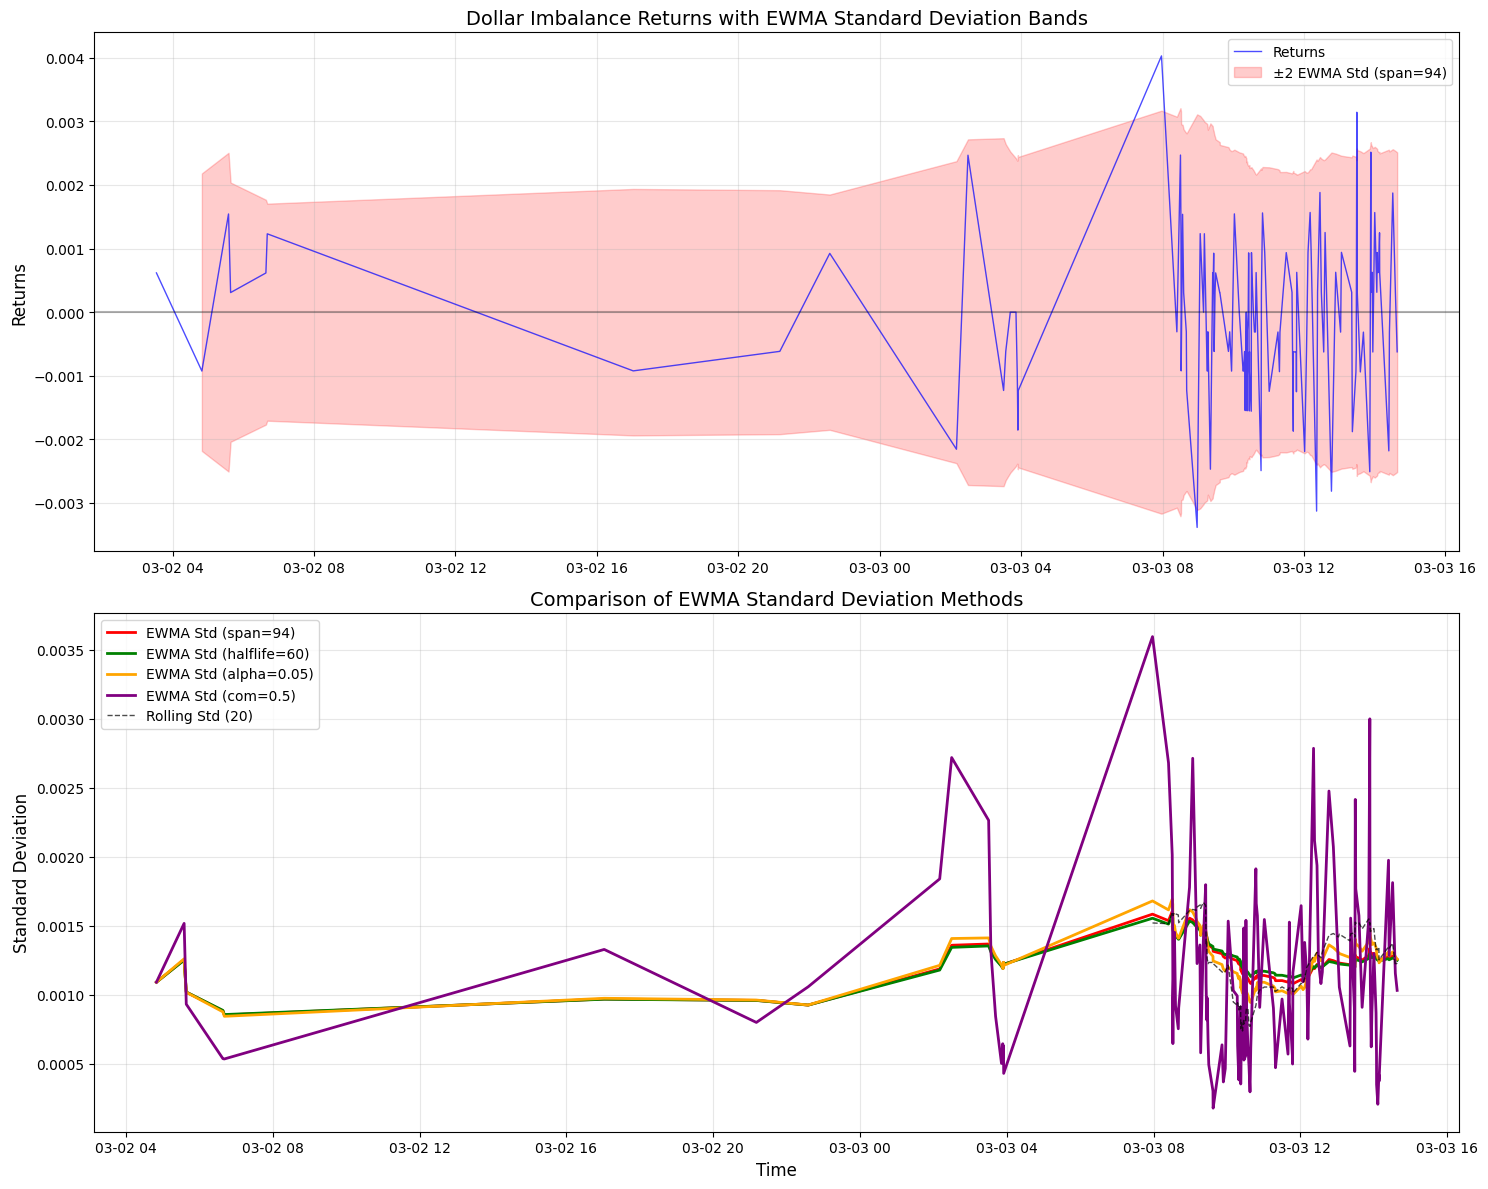

=== EWMA STANDARD DEVIATION ANALYSIS ===
Returns statistics:
  Mean: -0.000076
  Std: 0.001248
  Number of observations: 129

EWMA Standard Deviation (last 10 observations):
Span method (span=94):
  2023-03-03 14:04:22: 0.001281
  2023-03-03 14:04:29: 0.001270
  2023-03-03 14:06:32: 0.001260
  2023-03-03 14:08:14: 0.001260
  2023-03-03 14:08:28: 0.001249
  2023-03-03 14:24:00: 0.001278
  2023-03-03 14:25:01: 0.001264
  2023-03-03 14:30:42: 0.001282
  2023-03-03 14:35:09: 0.001268
  2023-03-03 14:38:08: 0.001257

Current EWMA Standard Deviations:
  Span method: 0.001257
  Halflife method: 0.001250
  Alpha method: 0.001258
  COM method: 0.001032
  Rolling std (20): 0.001231

Volatility-Adjusted Returns Statistics:
  Mean: -0.078593
  Std: 0.983549


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate returns for dollar bars
dollar_imbalance_returns = dollar_imbalance_ema['close'].pct_change().dropna()

# Calculate EWMA standard deviation
# You can use different methods:

# Method 1: Using pandas ewm with span (common choice is span=94 for daily data)
span = 94  # Adjust based on your data frequency
ewma_std_span = dollar_imbalance_returns.ewm(span=span).std()

# Method 2: Using pandas ewm with halflife (decay parameter)
halflife = 60  # Number of periods for half-life decay
ewma_std_halflife = dollar_imbalance_returns.ewm(halflife=halflife).std()

# Method 3: Using alpha parameter directly
alpha = 0.05  # Smoothing parameter (0 < alpha <= 1)
ewma_std_alpha = dollar_imbalance_returns.ewm(alpha=alpha).std()

# Method 4: Using com (center of mass)
com = 0.5  # Center of mass
ewma_std_com = dollar_imbalance_returns.ewm(com=com).std()

# Plot comparison
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Plot 1: Returns with EWMA std bands
axes[0].plot(dollar_imbalance_returns.index, dollar_imbalance_returns, 'b-', alpha=0.7, linewidth=1, label='Returns')
axes[0].fill_between(dollar_imbalance_returns.index, 
                     2*ewma_std_span, -2*ewma_std_span, 
                     alpha=0.2, color='red', label='±2 EWMA Std (span=94)')
axes[0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[0].set_title('Dollar Imbalance Returns with EWMA Standard Deviation Bands', fontsize=14)
axes[0].set_ylabel('Returns', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Different EWMA std calculations
axes[1].plot(ewma_std_span.index, ewma_std_span, 'r-', label=f'EWMA Std (span={span})', linewidth=2)
axes[1].plot(ewma_std_halflife.index, ewma_std_halflife, 'g-', label=f'EWMA Std (halflife={halflife})', linewidth=2)
axes[1].plot(ewma_std_alpha.index, ewma_std_alpha, 'orange', label=f'EWMA Std (alpha={alpha})', linewidth=2)
axes[1].plot(ewma_std_com.index, ewma_std_com, 'purple', label=f'EWMA Std (com={com})', linewidth=2)

# Add rolling standard deviation for comparison
rolling_window = 20
rolling_std = dollar_imbalance_returns.rolling(window=rolling_window).std()
axes[1].plot(rolling_std.index, rolling_std, 'k--', alpha=0.7, label=f'Rolling Std ({rolling_window})', linewidth=1)

axes[1].set_title('Comparison of EWMA Standard Deviation Methods', fontsize=14)
axes[1].set_xlabel('Time', fontsize=12)
axes[1].set_ylabel('Standard Deviation', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("=== EWMA STANDARD DEVIATION ANALYSIS ===")
print(f"Returns statistics:")
print(f"  Mean: {dollar_imbalance_returns.mean():.6f}")
print(f"  Std: {dollar_imbalance_returns.std():.6f}")
print(f"  Number of observations: {len(dollar_imbalance_returns)}")

print(f"\nEWMA Standard Deviation (last 10 observations):")
print(f"Span method (span={span}):")
for i, (idx, val) in enumerate(ewma_std_span.tail(10).items()):
    print(f"  {idx.strftime('%Y-%m-%d %H:%M:%S')}: {val:.6f}")

print(f"\nCurrent EWMA Standard Deviations:")
print(f"  Span method: {ewma_std_span.iloc[-1]:.6f}")
print(f"  Halflife method: {ewma_std_halflife.iloc[-1]:.6f}")
print(f"  Alpha method: {ewma_std_alpha.iloc[-1]:.6f}")
print(f"  COM method: {ewma_std_com.iloc[-1]:.6f}")
print(f"  Rolling std ({rolling_window}): {rolling_std.iloc[-1]:.6f}")

# Calculate volatility-adjusted returns (standardized)
volatility_adjusted_returns = dollar_imbalance_returns / ewma_std_span
print(f"\nVolatility-Adjusted Returns Statistics:")
print(f"  Mean: {volatility_adjusted_returns.mean():.6f}")
print(f"  Std: {volatility_adjusted_returns.std():.6f}")